In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn import svm
from sklearn import tree

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

In [ ]:
csv = pd.read_csv("Downloads/Wholesale_customers_data.csv")
csv.info() #No non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


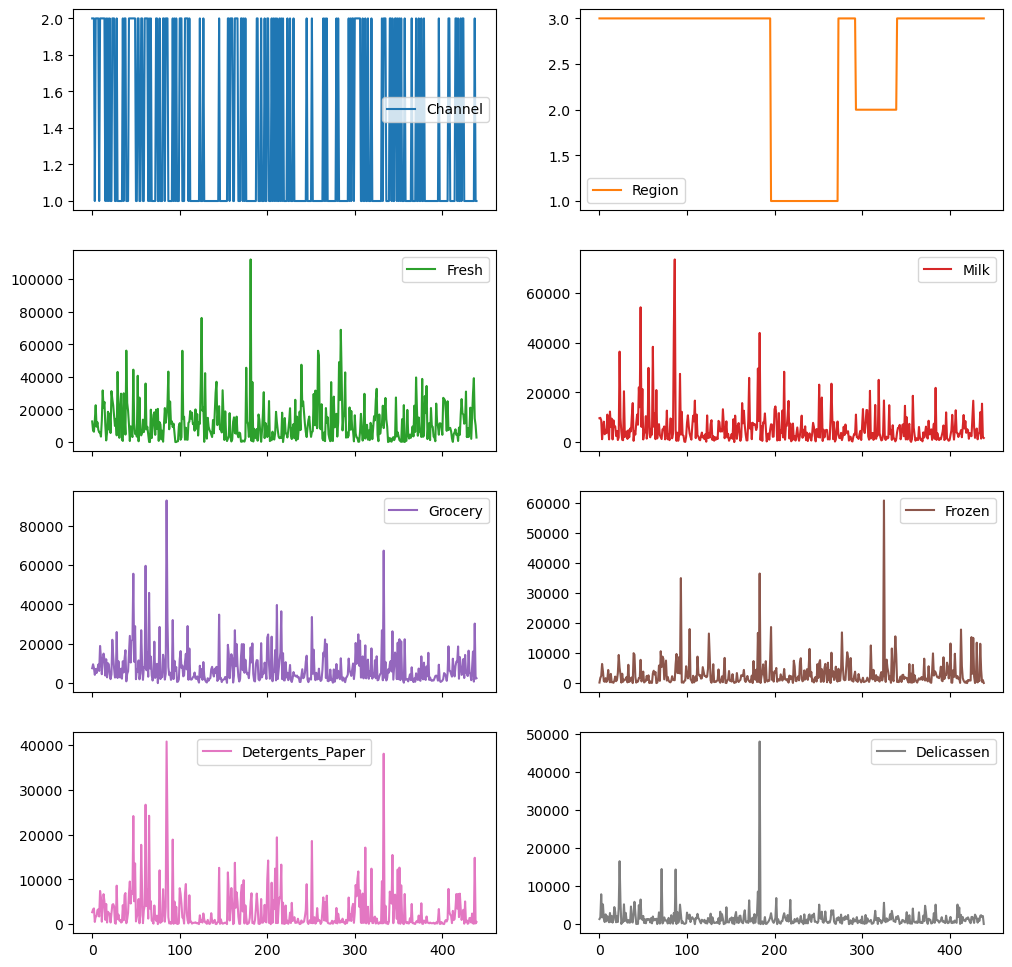

In [ ]:
csv.plot(subplots=True,layout=(4,2),figsize=(12, 12))
plt.show() #Plot the values to see outliers, etc.

<Axes: xlabel='Channel'>

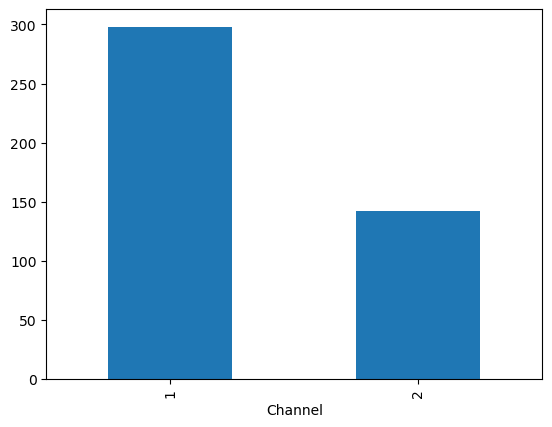

In [ ]:
xx = csv["Channel"].value_counts()
xx.plot(kind="bar")
#Unbalanced class detected

In [ ]:
#Binarizer and rescale values
lb = LabelBinarizer()
num_feats = len(csv.columns)
X = csv.drop(columns = "Channel").to_numpy()
X = X/np.sqrt(np.sum(X**2))
y = lb.fit_transform(csv["Channel"]).ravel()
print(y.shape)
print(X.shape)
#Before resample
X,y

(440,)
(440, 7)


(array([[5.74813713e-06, 2.42743831e-02, 1.85013374e-02, ...,
         4.10033782e-04, 5.12350622e-03, 2.56366916e-03],
        [5.74813713e-06, 1.35215346e-02, 1.87964084e-02, ...,
         3.37607254e-03, 6.30953852e-03, 3.40289718e-03],
        [5.74813713e-06, 1.21726384e-02, 1.68765306e-02, ...,
         4.60808993e-03, 6.73681671e-03, 1.50294625e-02],
        ...,
        [5.74813713e-06, 2.78420602e-02, 2.96757159e-02, ...,
         8.37311975e-04, 2.84360344e-02, 3.57725734e-03],
        [5.74813713e-06, 1.97161103e-02, 3.79568655e-03, ...,
         1.98885545e-03, 3.21895679e-04, 4.07159713e-03],
        [5.74813713e-06, 5.34001939e-03, 3.25344561e-03, ...,
         1.24542971e-04, 9.13953803e-04, 9.96343768e-05]]),
 array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [ ]:
#Split dataset and grid search both models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

svc = svm.SVC()
parameters = [{'kernel':['rbf', 'linear'], 'C':[1, 10, 100]}]
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(
    "The best parameters for svm are %s with a score of %0.2f"
    % (clf.best_params_, clf.best_score_)
)
tree_clf = tree.DecisionTreeClassifier()

parameters = [{'max_depth':[1,2,3,4,5,6]}]
tree_clf = GridSearchCV(tree_clf, parameters)
tree_clf.fit(X_train, y_train)
print(
    "The best parameters for tree are %s with a score of %0.2f"
    % (tree_clf.best_params_, tree_clf.best_score_)
)

The best parameters for svm are {'C': 10, 'kernel': 'rbf'} with a score of 0.91
The best parameters for tree are {'max_depth': 1} with a score of 0.93


In [ ]:
smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)
print("After SMOTE X: ", X_train_SMOTE.shape)
print("After SMOTE Y: ", y_train_SMOTE.shape)
svc_smote = svm.SVC()
parameters = [{'kernel':['rbf', 'linear'], 'C':[1, 10, 100]}]
clf_smote = GridSearchCV(svc_smote, parameters)
clf_smote.fit(X_train_SMOTE, y_train_SMOTE)
print(
    "The best parameters for svm are %s with a score of %0.2f"
    % (clf_smote.best_params_, clf_smote.best_score_)
)
tree_clf_smote = tree.DecisionTreeClassifier()

parameters = [{'max_depth':[1,2,3,4,5,6]}]
tree_clf_smote = GridSearchCV(tree_clf_smote, parameters)
tree_clf_smote.fit(X_train_SMOTE, y_train_SMOTE)
print(
    "The best parameters for tree are %s with a score of %0.2f"
    % (tree_clf_smote.best_params_, tree_clf_smote.best_score_)
)

After SMOTE X:  (466, 7)
After SMOTE Y:  (466,)
The best parameters for svm are {'C': 10, 'kernel': 'rbf'} with a score of 0.92
The best parameters for tree are {'max_depth': 1} with a score of 0.94


In [ ]:
tree_clf = tree.DecisionTreeClassifier(**tree_clf.best_params_,
                                       random_state = 42)
tree_clf.fit(X_train, y_train)

tree_clf_smote = tree.DecisionTreeClassifier(**tree_clf_smote.best_params_,
                                       random_state = 42)
tree_clf_smote.fit(X_train_SMOTE, y_train_SMOTE)
#Train final tree classifier

DecisionTreeClassifier(max_depth=1, random_state=42)

In [ ]:
svc = svm.SVC(**clf.best_params_)
svc.fit(X_train, y_train)

svc_smote = svm.SVC(**clf_smote.best_params_)
svc_smote.fit(X_train_SMOTE, y_train_SMOTE)
#Train final SVM model

SVC(C=10)

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
#function that produces horizontal bar graph of importances

Text(0.5, 1.0, 'Feature Importance for Support Vector Machine Classifier')

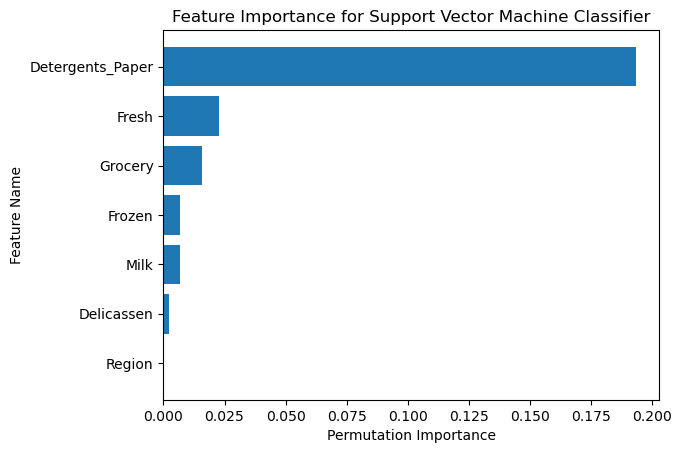

In [ ]:
features_names = csv.drop(columns="Channel").columns
perm_importance = permutation_importance(svc, X_test, y_test)
features = np.array(features_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel('Feature Name')
plt.title('Feature Importance for Support Vector Machine Classifier')
#Make Feature Importance bar graph for SVM

Text(0.5, 1.0, 'Feature Importance for Support Vector Machine Classifier + SMOTE')

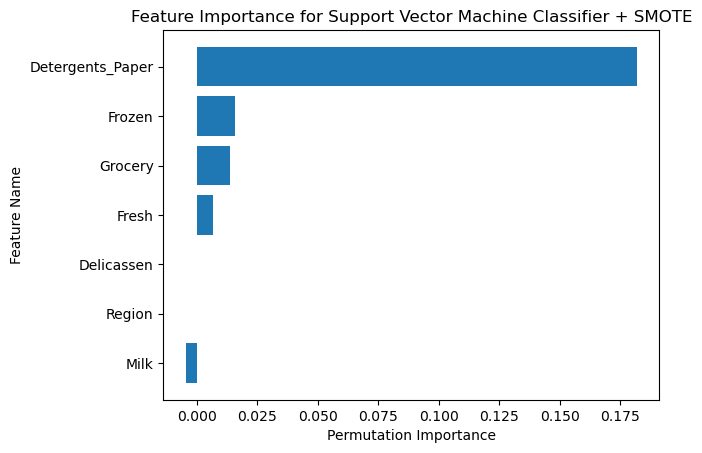

In [ ]:
perm_importance = permutation_importance(svc_smote, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel('Feature Name')
plt.title('Feature Importance for Support Vector Machine Classifier + SMOTE')
#Make Feature Importance bar graph for SVM + SMOTE

Text(0.5, 1.0, 'Feature Importance for Decision Tree Classifier')

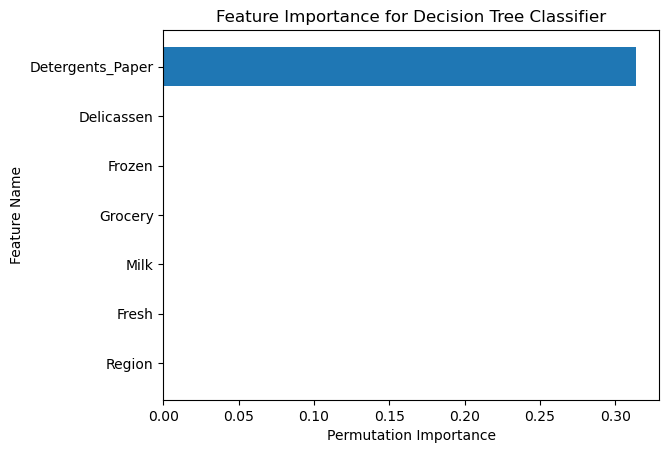

In [ ]:
perm_importance = permutation_importance(tree_clf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier')
#Make Feature Importance bar graph for tree classifier

Text(0.5, 1.0, 'Feature Importance for Decision Tree Classifier + SMOTE')

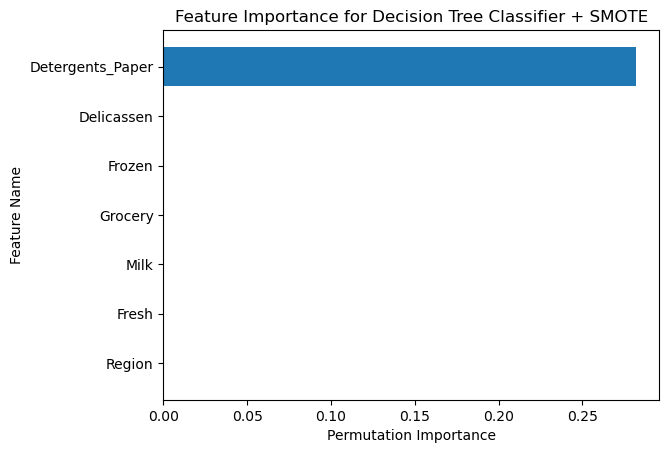

In [ ]:
perm_importance = permutation_importance(tree_clf_smote, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Classifier + SMOTE')
#Make Feature Importance bar graph for tree classifier + SMOTE

In [ ]:
#Show classification report for all the models to determine best model
y_pred = tree_clf.predict(X_test)
labels = ["Hotel", "Retail"]
print('Classifcation Report for Tree: \n', classification_report(y_test, y_pred, target_names=labels))

y_pred = svc.predict(X_test)
print('Classifcation Report for SVM: \n', classification_report(y_test, y_pred, target_names=labels))

y_pred = tree_clf_smote.predict(X_test)
print('Classifcation Report for Tree + SMOTE: \n', classification_report(y_test, y_pred, target_names=labels))

y_pred = svc_smote.predict(X_test)
print('Classifcation Report for SVM + SMOTE: \n', classification_report(y_test, y_pred, target_names=labels))

Classifcation Report for Tree: 
               precision    recall  f1-score   support

       Hotel       0.96      0.85      0.90        65
      Retail       0.68      0.91      0.78        23

    accuracy                           0.86        88
   macro avg       0.82      0.88      0.84        88
weighted avg       0.89      0.86      0.87        88

Classifcation Report for SVM: 
               precision    recall  f1-score   support

       Hotel       0.97      0.91      0.94        65
      Retail       0.78      0.91      0.84        23

    accuracy                           0.91        88
   macro avg       0.87      0.91      0.89        88
weighted avg       0.92      0.91      0.91        88

Classifcation Report for Tree + SMOTE: 
               precision    recall  f1-score   support

       Hotel       0.96      0.85      0.90        65
      Retail       0.68      0.91      0.78        23

    accuracy                           0.86        88
   macro avg       0.8

Which model preformed the best and at what hyperparameter values?

-The best model was the support vector machine with the RBF kernel and a C=10 without oversampling

Which feature seems to play the most important role in predicting the label? Was
it the same for both models?

-Detergents paper was the most important to predicting feature to predicting the hotel or retail variable
-It was the same for both models

What did you learn from this project that enhanced your knowledge of 'Machine Learning'?

-I learned how to plot feature importances and using imbalanced class redistribution methods for tabular data. I have used this for image data before.